In [1]:
import numpy as np
import pandas as pd
from sortedcontainers import SortedList
from datetime import datetime
import matplotlib.pyplot as plt

In [2]:
def getData(limit = None):
    df = pd.read_csv("train.csv")
    data = df.values
    np.random.shuffle(data) # To make order random at the time of sampling 
    X = data[:, 1:] / 255.0 # Scaled between 0-1
    Y = data[:, 0]
    if limit is not None:
        X, Y = X[:limit], Y[:limit]
    return X, Y

In [3]:
class KNN(object):
    def __init__(self, k):
        self.k = k
    
    def fit(self, x, y):
        self. x = x
        self.y = y
        
    def predict(self, x):
        y = np.zeros(len(x))
        for i, x in enumerate(x):
            sortedL = SortedList()
            for j, xt in enumerate(self.x):
                diff = x - xt
                d = diff.dot(diff)
                if len(sortedL) < self.k:
                    sortedL.add((d, self.y[j]))
                else:
                    if d < sortedL[-1][0]:
                        del sortedL[-1]
                        sortedL.add((d, self.y[j]))
            votes = {}
            for _, v in sortedL:
                votes[v] = votes.get(v, 0) + 1
            maxVotes = 0
            maxVotesClass = -1
            for v, count in votes.items():
                if count > maxVotes:
                    maxVotes = count
                    maxVotesClass = v
            y[i] = maxVotesClass
        return y
    
    def score(self, x, y):
        p = self.predict(x)
        return np.mean(p == y)

In [4]:
def XOR():
    X = np.zeros((200, 2))
    X[:50] = np.random.random((50, 2)) / 2 + 0.5
    X[50:100] = np.random.random((50, 2)) / 2
    X[100:150] = np.random.random((50, 2)) / 2 + np.array([([0, 0.5])])
    X[150:] = np.random.random((50, 2)) / 2 + np.array([([0, 0.5])])
    Y = np.array([0] * 100 + [1] * 100)
    return X, Y

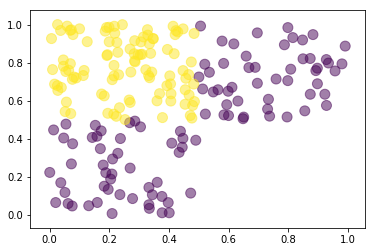

In [5]:
X, Y = XOR()
plt.scatter(X[:,0], X[:,1], s = 100, c = Y, alpha = 0.5)
plt.show()

In [6]:
model = KNN(3)
model.fit(X, Y)
print("Train Accuracy: ", model.score(X, Y))

Train Accuracy:  0.98
